<a href="https://colab.research.google.com/github/salidego/Talento-Tech/blob/main/1_1_Dataset_Banco_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio # 1

### Temas: Limpieza de Datos, análisis de negocio, integración de fuentes de datos

# 1. El problema del negocio

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

#2. El set de datos

La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (`dataset_banco.csv`) con 45215 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual de ingresos en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

#3. Una primera mirada al dataset

In [1]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Lectura
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Establezco la ruta de lectura del archivo
ruta = "/content/dataset_banco.csv"
data = pd.read_csv(ruta)

In [5]:
#proporciona visualización y exploración de datos con el dataset cargado

# **Visualización y Exploración de Datos:**


*   df.head(): Muestra las primeras filas del DataFrame.
*   df.tail(): Muestra las últimas filas del DataFrame.
*   df.info(): Muestra información sobre el DataFrame, incluyendo tipos de datos y valores no nulos.
*   df.describe(): Proporciona estadísticas descriptivas para columnas numéricas.
*   df.shape: Devuelve una tupla con la cantidad de filas y columnas del DataFrame.
*   df.columns: Devuelve una lista con los nombres de las columnas del DataFrame.

In [6]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [8]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45210,51,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977.0,3,-1.0,0,unknown,yes
45211,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2,-1.0,0,unknown,yes
45212,72,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127.0,5,184.0,3,success,yes
45213,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4,-1.0,0,unknown,no
45214,37,entrepreneur,married,secondary,no,2971.0,no,no,cellular,17,nov,361.0,2,188.0,11,other,no


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45215 entries, 0 to 45214
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45215 non-null  int64  
 1   job        45213 non-null  object 
 2   marital    45214 non-null  object 
 3   education  45214 non-null  object 
 4   default    45215 non-null  object 
 5   balance    45213 non-null  float64
 6   housing    45215 non-null  object 
 7   loan       45215 non-null  object 
 8   contact    45215 non-null  object 
 9   day        45215 non-null  int64  
 10  month      45215 non-null  object 
 11  duration   45214 non-null  float64
 12  campaign   45215 non-null  int64  
 13  pdays      45214 non-null  float64
 14  previous   45215 non-null  int64  
 15  poutcome   45215 non-null  object 
 16  y          45215 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


## Transformación de nombres de atributos

In [10]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45215.000000,45213.000000,45215.000000,45214.000000,45215.000000,45214.000000,45215.000000
mean,41.004711,1374.159866,15.805839,258.074357,2.763729,40.192485,0.580383
std,12.036647,3924.255525,8.322473,257.605175,3.097910,100.120622,2.303438
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
data.shape

(45215, 17)

In [12]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [13]:
df = data

In [14]:
#cambia los nombres de las columnas del dataframe
# Renombramos las columnas
data_rename_2 = df.rename(columns={
                                  'age':        'edad',
                                  'job':        'trabajo',
                                  'marital':    'estado_civil',
                                  'education':  'educacion',
                                  'default':    'morosidad',
                                  'balance':    'saldo',
                                  'housing':    'vivienda',
                                  'loan':       'prestamo',
                                  'contact':    'contacto',
                                  'day':        'dia',
                                  'month':      'mes',
                                  'duration':   'duracion',
                                  'campaign':   'campana',
                                  'pdays':      'dias_previos',
                                  'previous':   'anterior',
                                  'poutcome':   'resultado',
                                  'y':          'respuesta'})

# Verificamos los cambios
print(data_rename_2.head())

   edad       trabajo estado_civil  educacion morosidad   saldo vivienda  \
0    58    management      married   tertiary        no  2143.0      yes   
1    44    technician       single  secondary        no    29.0      yes   
2    33  entrepreneur      married  secondary        no     2.0      yes   
3    47   blue-collar      married    unknown        no  1506.0      yes   
4    33       unknown       single    unknown        no     1.0       no   

  prestamo contacto  dia  mes  duracion  campana  dias_previos  anterior  \
0       no  unknown    5  may     261.0        1          -1.0         0   
1       no  unknown    5  may     151.0        1          -1.0         0   
2      yes  unknown    5  may      76.0        1          -1.0         0   
3       no  unknown    5  may      92.0        1          -1.0         0   
4       no  unknown    5  may     198.0        1          -1.0         0   

  resultado respuesta  
0   unknown        no  
1   unknown        no  
2   unknown   

In [15]:
# Renombrar las columnas #2
df.columns = ['edad',
              'trabajo',
              'estado_civil',
              'educacion',
              'incumplimiento',
              'saldo',
              'vivienda',
              'prestamo',
              'contacto',
              'dia',
              'mes',
              'duracion',
              'campaña',
              'dias_previos',
              'anterior',
              'resultado_prev',
              'respuesta']

print(df.columns)

Index(['edad', 'trabajo', 'estado_civil', 'educacion', 'incumplimiento',
       'saldo', 'vivienda', 'prestamo', 'contacto', 'dia', 'mes', 'duracion',
       'campaña', 'dias_previos', 'anterior', 'resultado_prev', 'respuesta'],
      dtype='object')


In [17]:
#visualiza las primeras líneas de tu .csv

In [18]:
df.head()

,edad,trabajo,estado_civil,educacion,incumplimiento,saldo,vivienda,prestamo,contacto,dia,mes,duracion,campaña,dias_previos,anterior,resultado_prev,respuesta
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


In [ ]:
#visualiza las variables categóricas y las numéricas

In [19]:
#variables categóricas =
variables_categoricas = df.select_dtypes(include=['object', 'category'])
variables_categoricas.head()

,trabajo,estado_civil,educacion,incumplimiento,vivienda,prestamo,contacto,mes,resultado_prev,respuesta
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


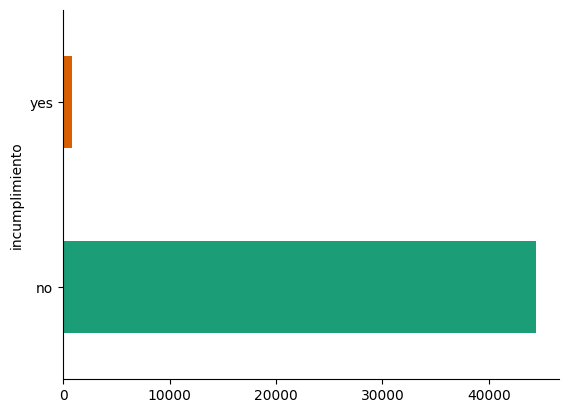

In [ ]:
# @title incumplimiento

from matplotlib import pyplot as plt
import seaborn as sns
variables_categoricas.groupby('incumplimiento').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

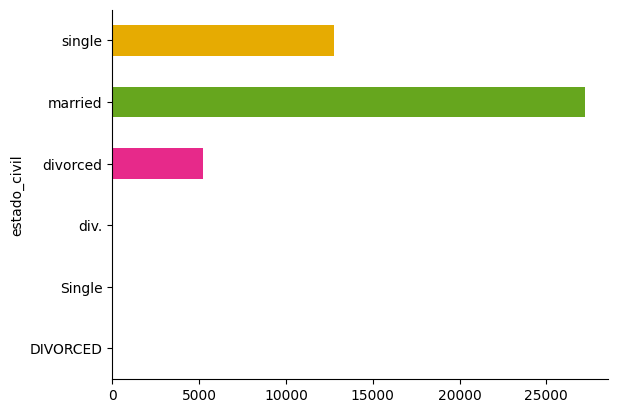

In [ ]:
# @title estado_civil

from matplotlib import pyplot as plt
import seaborn as sns
variables_categoricas.groupby('estado_civil').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

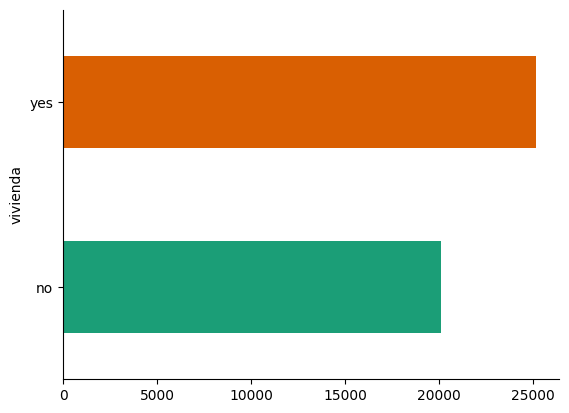

In [ ]:
# @title vivienda

from matplotlib import pyplot as plt
import seaborn as sns
variables_categoricas.groupby('vivienda').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [20]:
# Variables uméricas
variables_numericas = df.select_dtypes(include=['number'])
variables_numericas.head()

,edad,saldo,dia,duracion,campaña,dias_previos,anterior
0,58,2143.0,5,261.0,1,-1.0,0
1,44,29.0,5,151.0,1,-1.0,0
2,33,2.0,5,76.0,1,-1.0,0
3,47,1506.0,5,92.0,1,-1.0,0
4,33,1.0,5,198.0,1,-1.0,0


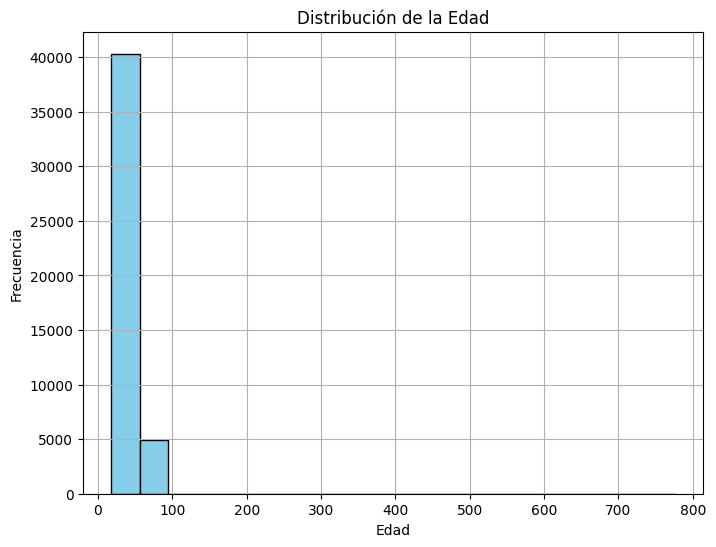

In [21]:
#Visualizar Edad con un histograma y ver su distribución

plt.figure(figsize=(8,6))
plt.hist(df['edad'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


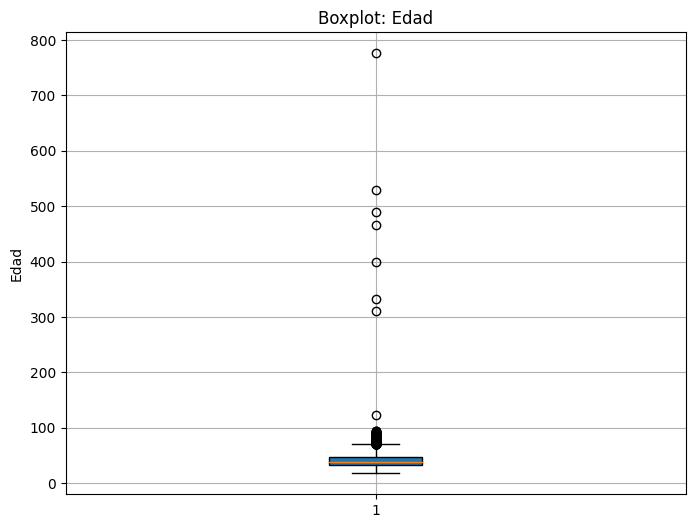

In [22]:
# Boxplot para 'edad' visualizar los cuartiles y posibles valores atípicos
plt.figure(figsize=(8,6))
plt.boxplot(df['edad'], patch_artist=True)
plt.title('Boxplot: Edad')
plt.ylabel('Edad')
plt.grid(True)
plt.show()



Hay valores atípicos en la variable edad lo que implica hacer limpieza de datos y exclusión de estos valores atípicos

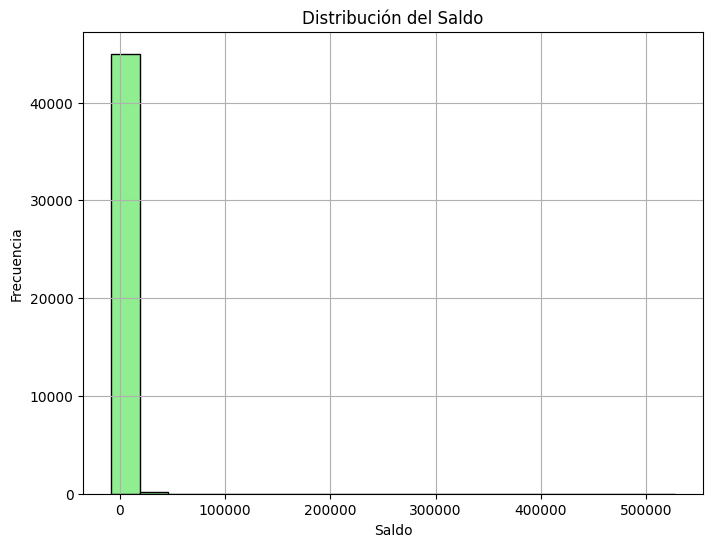

In [23]:
# Crear un histograma para la columna 'saldo'
plt.figure(figsize=(8,6))
plt.hist(df['saldo'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribución del Saldo')
plt.xlabel('Saldo')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


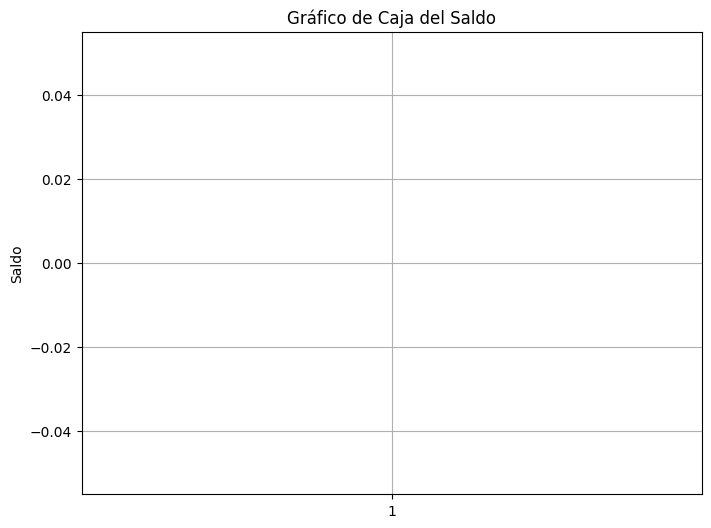

In [24]:
# Crear un boxplot para la columna 'saldo'
plt.figure(figsize=(8,6))
plt.boxplot(df['saldo'], patch_artist=True)
plt.title('Gráfico de Caja del Saldo')
plt.ylabel('Saldo')
plt.grid(True)
plt.show()


In [25]:
#clasificar columnas
categoricas = df.select_dtypes(include=['object']).columns.tolist()
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Columnas categóricas:", categoricas)
print("Columnas numéricas:", numericas)

Columnas categóricas: ['trabajo', 'estado_civil', 'educacion', 'incumplimiento', 'vivienda', 'prestamo', 'contacto', 'mes', 'resultado_prev', 'respuesta']
Columnas numéricas: ['edad', 'saldo', 'dia', 'duracion', 'campaña', 'dias_previos', 'anterior']


In [26]:
pd.value_counts(df['trabajo'])

<ipython-input-26-a749978c510d>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['trabajo'])


,count
trabajo,
blue-collar,9731
management,9455
technician,7599
admin.,5168
services,4153
retired,2263
self-employed,1578
entrepreneur,1487
unemployed,1303


In [27]:
#proporciona estadísticas descriptivas para columnas numéricas

estadistica_descriptiva = df.describe()
print(estadistica_descriptiva)

               edad          saldo           dia      duracion       campaña  \
count  45215.000000   45213.000000  45215.000000  45214.000000  45215.000000   
mean      41.004711    1374.159866     15.805839    258.074357      2.763729   
std       12.036647    3924.255525      8.322473    257.605175      3.097910   
min       18.000000   -8019.000000      1.000000  -1389.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max      776.000000  527532.000000     31.000000   4918.000000     63.000000   

       dias_previos      anterior  
count  45214.000000  45215.000000  
mean      40.192485      0.580383  
std      100.120622      2.303438  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

## 4. Limpieza

Realizaremos el proceso de limpieza teniendo en cuenta las situaciones más comunes:

1. Datos faltantes en algunas celdas
2. Columnas irrelevantes (que no responden al problema que queremos resolver)
3. Registros (filas) repetidos
4. Valores extremos (*outliers*) en el caso de las variables numéricas. Se deben analizar en detalle pues no necesariamente la solución es eliminarlos
5. Errores tipográficos en el caso de las variables categóricas

Al final de este proceso de limpieza deberíamos tener un set de datos **íntegro**, listo para la fase de Análisis Exploratorio.

**Identificar valores faltantes:**

In [28]:
# Ver las columnas con valores nulos
print(df.isnull().sum())

# Eliminar filas con valores nulos
df_clean = df.dropna()

# O imputar valores para variables numéricas)
df['saldo'].fillna(df['saldo'].mean(), inplace=True)


edad              0
trabajo           2
estado_civil      1
educacion         1
incumplimiento    0
saldo             2
vivienda          0
prestamo          0
contacto          0
dia               0
mes               0
duracion          1
campaña           0
dias_previos      1
anterior          0
resultado_prev    0
respuesta         0
dtype: int64


<ipython-input-28-12e7186a8027>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['saldo'].fillna(df['saldo'].mean(), inplace=True)


## 4.1 Datos faltantes

Acá comenzamos a ver que los datos no están completos, pues no todas las columnas tienen la misma cantidad de registros.

El número total de registros debería ser 45.215. Sin embargo columnas como "job", "marital", "education", "balance", "duration" y "pdays".

Por ser tan pocos los datos  faltantes optaremos por eliminar las filas correspondientes:

In [29]:
#Comando para contar los valores faltantes de mi dataframe
data.isna().sum()

,0
edad,0
trabajo,2
estado_civil,1
educacion,1
incumplimiento,0
saldo,0
vivienda,0
prestamo,0
contacto,0
dia,0


In [30]:
#elimino los valores faltantes de mi dataframe
data.dropna(inplace=True)

#conteo de valores por columna de mi dataframe
data.count()

,0
edad,45209
trabajo,45209
estado_civil,45209
educacion,45209
incumplimiento,45209
saldo,45209
vivienda,45209
prestamo,45209
contacto,45209
dia,45209


##4.2 Columnas irrelevantes

Una columna irrelevante puede ser:

- **Una columna que no contiene información relevante para el problema que queremos resolver**. Por ejemplo en este caso podría ser una columna que no guarde relación con el posible perfil del cliente (deporte favorito, hobbies, comida favorita, etc.)
- **Una columna categórica pero con un sólo nivel**. Por ejemplo si en la columna "job" solo tuviésemos el nivel "unknown".
- **Una columna numérica pero con un sólo valor**. Por ejemplo si en la columna "edad" todos los valores fuesen iguales a 50.
- **Columnas con información redundante**. Por ejemplo si además de las columnas "month" y "day" tuviésemos la columna "month-day", resultado de combinar las dos anteriores.

Si tenemos la duda de si alguna columna puede ser relevante o no lo mejor es dejarla (y más adelante en posteriores etapas podremos darnos cuenta de si se debe preservar o no).

En este caso todas las columnas pueden resultar relevantes, pero debemos verificar que no haya columnas categóricas con un sólo nivel, o columnas numéricas con un sólo valor:

# **for col in cols_cat:**
Este es un bucle for que itera sobre cada elemento en la lista cols_cat. La variable col tomará el valor de cada elemento en cada iteración del bucle.

print(f'Columna {col}: {data[col].nunique()} subniveles'): Dentro del bucle, esta línea de código imprime un mensaje que indica el nombre de la columna (col), seguido por el número de subniveles únicos en esa columna.

f'Columna {col}: {data[col].nunique()} subniveles': Esta es una cadena de formato (f-string) que contiene dos variables:
{col}: Representa el nombre de la columna actual en la iteración del bucle.
{data[col].nunique()}: Representa el número de subniveles únicos en la columna actual. data[col] selecciona la columna actual del DataFrame y .nunique() calcula el número de valores únicos en esa columna.

In [36]:
# Conteo de los niveles en las diferentes columnas categóricas
cols_cat = ['trabajo', 'estado_civil', 'educacion', 'vivienda',
       'prestamo', 'contacto', 'mes', 'resultado_prev', 'anterior', 'respuesta']

for col in cols_cat:
  print(f'Columna {col}: {df[col].nunique()} subniveles')

Columna trabajo: 18 subniveles
Columna estado_civil: 6 subniveles
Columna educacion: 10 subniveles
Columna vivienda: 2 subniveles
Columna prestamo: 6 subniveles
Columna contacto: 5 subniveles
Columna mes: 12 subniveles
Columna resultado_prev: 6 subniveles
Columna anterior: 41 subniveles
Columna respuesta: 2 subniveles


In [37]:
#Conteo los valores
pd.value_counts(df['trabajo'])

<ipython-input-37-b08e8fe1f179>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['trabajo'])


,count
trabajo,
blue-collar,9730
management,9455
technician,7597
admin.,5167
services,4153
retired,2263
self-employed,1578
entrepreneur,1487
unemployed,1303


Todas las columnas categóricas tienen más de 1 subnivel. No eliminaremos ninguna.

Verifiquemos lo que ocurre con las columnas numéricas:

Todas las columnas numéricas tienen desviaciones estándar ("std") diferentes de cero, lo que indica que no tienen un único valor.

Preservaremos todas las columnas numéricas.

La **desviación estándar** es una medida que nos indica qué tan dispersos o alejados están los valores de un conjunto de datos respecto a su media o promedio. En otras palabras, nos ayuda a entender cuánto varían los valores individuales de un conjunto de datos con respecto a su valor promedio.

Imagina que tienes un conjunto de datos que representa las alturas de estudiantes en una clase. Si la desviación estándar es baja, significa que la mayoría de los estudiantes tienen alturas muy similares entre sí y cercanas a la altura promedio de la clase. Por otro lado, si la desviación estándar es alta, significa que las alturas de los estudiantes están muy dispersas, algunos son muy altos y otros muy bajos en comparación con la altura promedio.

Entonces, la desviación estándar nos da una idea de la dispersión o variabilidad de los datos alrededor de su promedio. Una desviación estándar baja indica que los datos están más agrupados alrededor del promedio, mientras que una desviación estándar alta indica que los datos están más dispersos o separados del promedio.

In [39]:
data.columns

Index(['edad', 'trabajo', 'estado_civil', 'educacion', 'incumplimiento',
       'saldo', 'vivienda', 'prestamo', 'contacto', 'dia', 'mes', 'duracion',
       'campaña', 'dias_previos', 'anterior', 'resultado_prev', 'respuesta'],
      dtype='object')

In [42]:
# Calcular la desviación estándar para las columnas numéricas
desviaciones_estandar = data[['edad', 'saldo', 'dia', 'duracion', 'campaña', 'dias_previos', 'anterior']].std()

# Imprimir las desviaciones estándar
print(desviaciones_estandar)

edad              12.037150
saldo           3924.404854
dia                8.322931
duracion         257.546273
campaña            3.097993
dias_previos     100.107932
anterior           2.303292
dtype: float64


In [43]:
#desviacion estandar para la variable 'pdays'
destd_pdays = data[['dias_previos']].std()

# Imprimir las desviaciones estándar
print(destd_pdays)

dias_previos    100.107932
dtype: float64


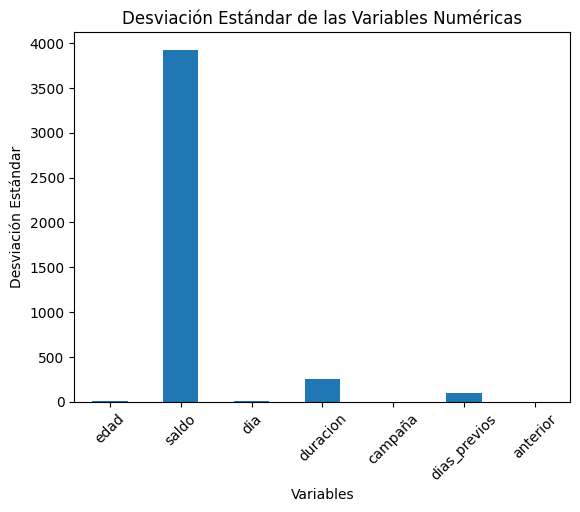

In [44]:
# Crear una gráfica de barras para representar las desviaciones estándar
desviaciones_estandar.plot(kind='bar')
plt.title('Desviación Estándar de las Variables Numéricas')
plt.xlabel('Variables')
plt.ylabel('Desviación Estándar')
plt.xticks(rotation=45)
plt.show()

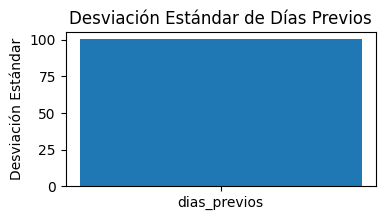

In [46]:
# Graficar la desviación estándar de 'pdays'
plt.figure(figsize=(4, 2))  # Configura el tamaño de la figura
plt.bar('dias_previos', destd_pdays)  # Crea una barra para la desviación estándar de 'pdays'
plt.title('Desviación Estándar de Días Previos')
plt.ylabel('Desviación Estándar')
plt.show()

In [47]:
# Calcula la media del atributo "pdays: dias de contacto al usuario antes de la campaña actual"
media = data['dias_previos'].mean()

print("Promedio de dias de contacto:", media)

Promedio de dias de contacto: 40.18275122210179


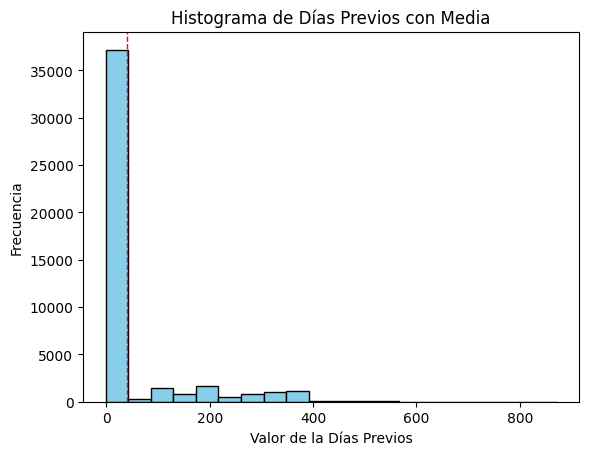

In [49]:
# Graficar un histograma del atributo "pdays"
plt.hist(data['dias_previos'], bins=20, color='skyblue', edgecolor='black')

# Agregar una línea vertical para mostrar la media
plt.axvline(media, color='red', linestyle='dashed', linewidth=1)

# Etiquetas y título
plt.xlabel('Valor de la Días Previos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Días Previos con Media')

# Mostrar la gráfica
plt.show()

##4.3 Filas repetidas

In [50]:
#Mostramos la cantidad de registros antes de aplicar una transformación, limpieza o filtro
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
#Mostramos la cantidad de registros después de aplicar una transformación, limpieza o filtro
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

Tamaño del set antes de eliminar las filas repetidas: (45209, 17)
Tamaño del set después de eliminar las filas repetidas: (45205, 17)


##4.4 *Outliers* en las variables numéricas

No siempre se deben eliminar los *outliers* porque dependiendo de la variable numérica analizada estos pueden contener información importante.

Creemos gráficas tipo "boxplot" de las columnas numéricas:

In [51]:
data.columns

Index(['edad', 'trabajo', 'estado_civil', 'educacion', 'incumplimiento',
       'saldo', 'vivienda', 'prestamo', 'contacto', 'dia', 'mes', 'duracion',
       'campaña', 'dias_previos', 'anterior', 'resultado_prev', 'respuesta'],
      dtype='object')

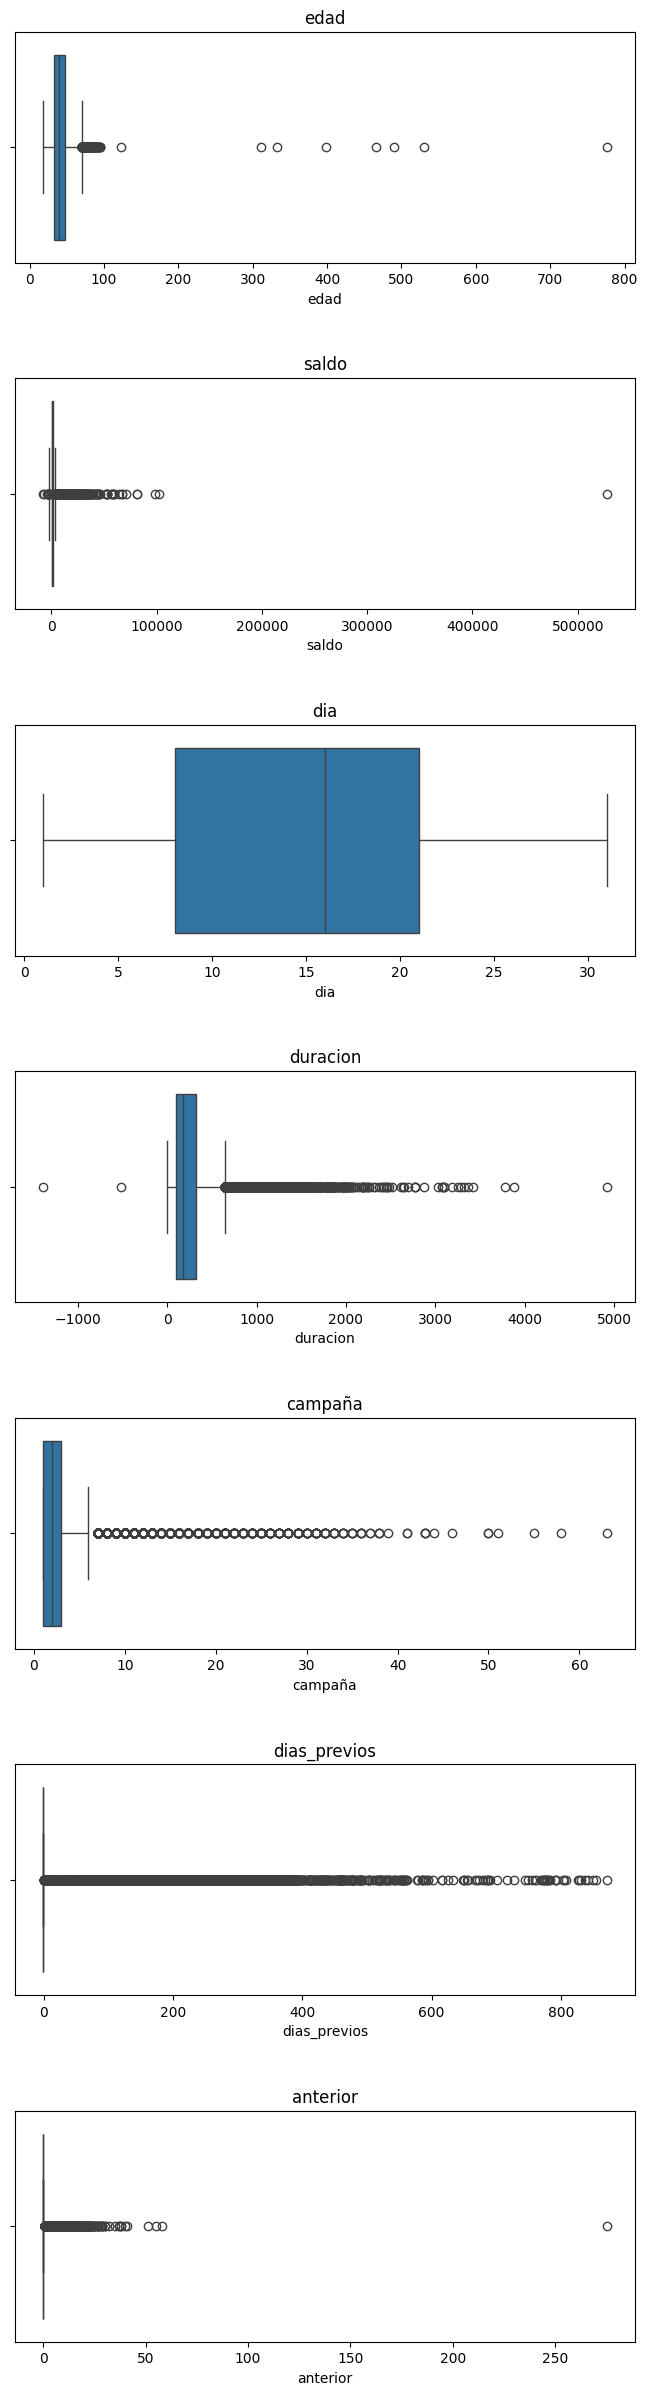

In [52]:
# Generar gráficas individuales pues las variables numéricas
# están en rangos diferentes
cols_num = ['edad', 'saldo', 'dia', 'duracion', 'campaña',
            'dias_previos', 'anterior']

fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

**Observaciones:**
- "age": hay sujetos con edades mucho mayores a 100 años
- "duration": hay valores negativos
- "previous": hay un valor extremadamente alto (cercano a 300)

In [54]:
# Eliminar filas con "age">100
print(f'Tamaño del set antes de eliminar registros de edad: {data.shape}')
data = data.drop(data[data['edad'] > 100].index)
print(f'Tamaño del set después de eliminar registros de edad: {data.shape}')

Tamaño del set antes de eliminar registros de edad: (45205, 17)
Tamaño del set después de eliminar registros de edad: (45197, 17)


In [55]:
# Eliminar filas con "duration"<0
print(f'Tamaño del set antes de eliminar registros de duración: {data.shape}')
data = data.drop(data[data['duracion'] < 0].index)
#data = data[data['duration']>0]
print(f'Tamaño del set después de eliminar registros de duración: {data.shape}')

Tamaño del set antes de eliminar registros de duración: (45197, 17)
Tamaño del set después de eliminar registros de duración: (45195, 17)


In [56]:
# Eliminar filas con "previous">100
print(f'Tamaño del set antes de eliminar registros de anterior: {data.shape}')
data = data.drop(data[data['anterior'] >100 ].index)
#data = data[data['duration']>0]
print(f'Tamaño del set después de eliminar registros de anterior: {data.shape}')

Tamaño del set antes de eliminar registros de anterior: (45195, 17)
Tamaño del set después de eliminar registros de anterior: (45194, 17)


##4.5 Errores tipográficos en variables categóricas

En una variable categórica pueden aparecer sub-niveles como "unknown" y "UNK" que para nosotros son equivalentes pero que para nuestro programa parecerían diferentes.

Se deben unificar estos sub-niveles

In [57]:
data.columns

Index(['edad', 'trabajo', 'estado_civil', 'educacion', 'incumplimiento',
       'saldo', 'vivienda', 'prestamo', 'contacto', 'dia', 'mes', 'duracion',
       'campaña', 'dias_previos', 'anterior', 'resultado_prev', 'respuesta'],
      dtype='object')

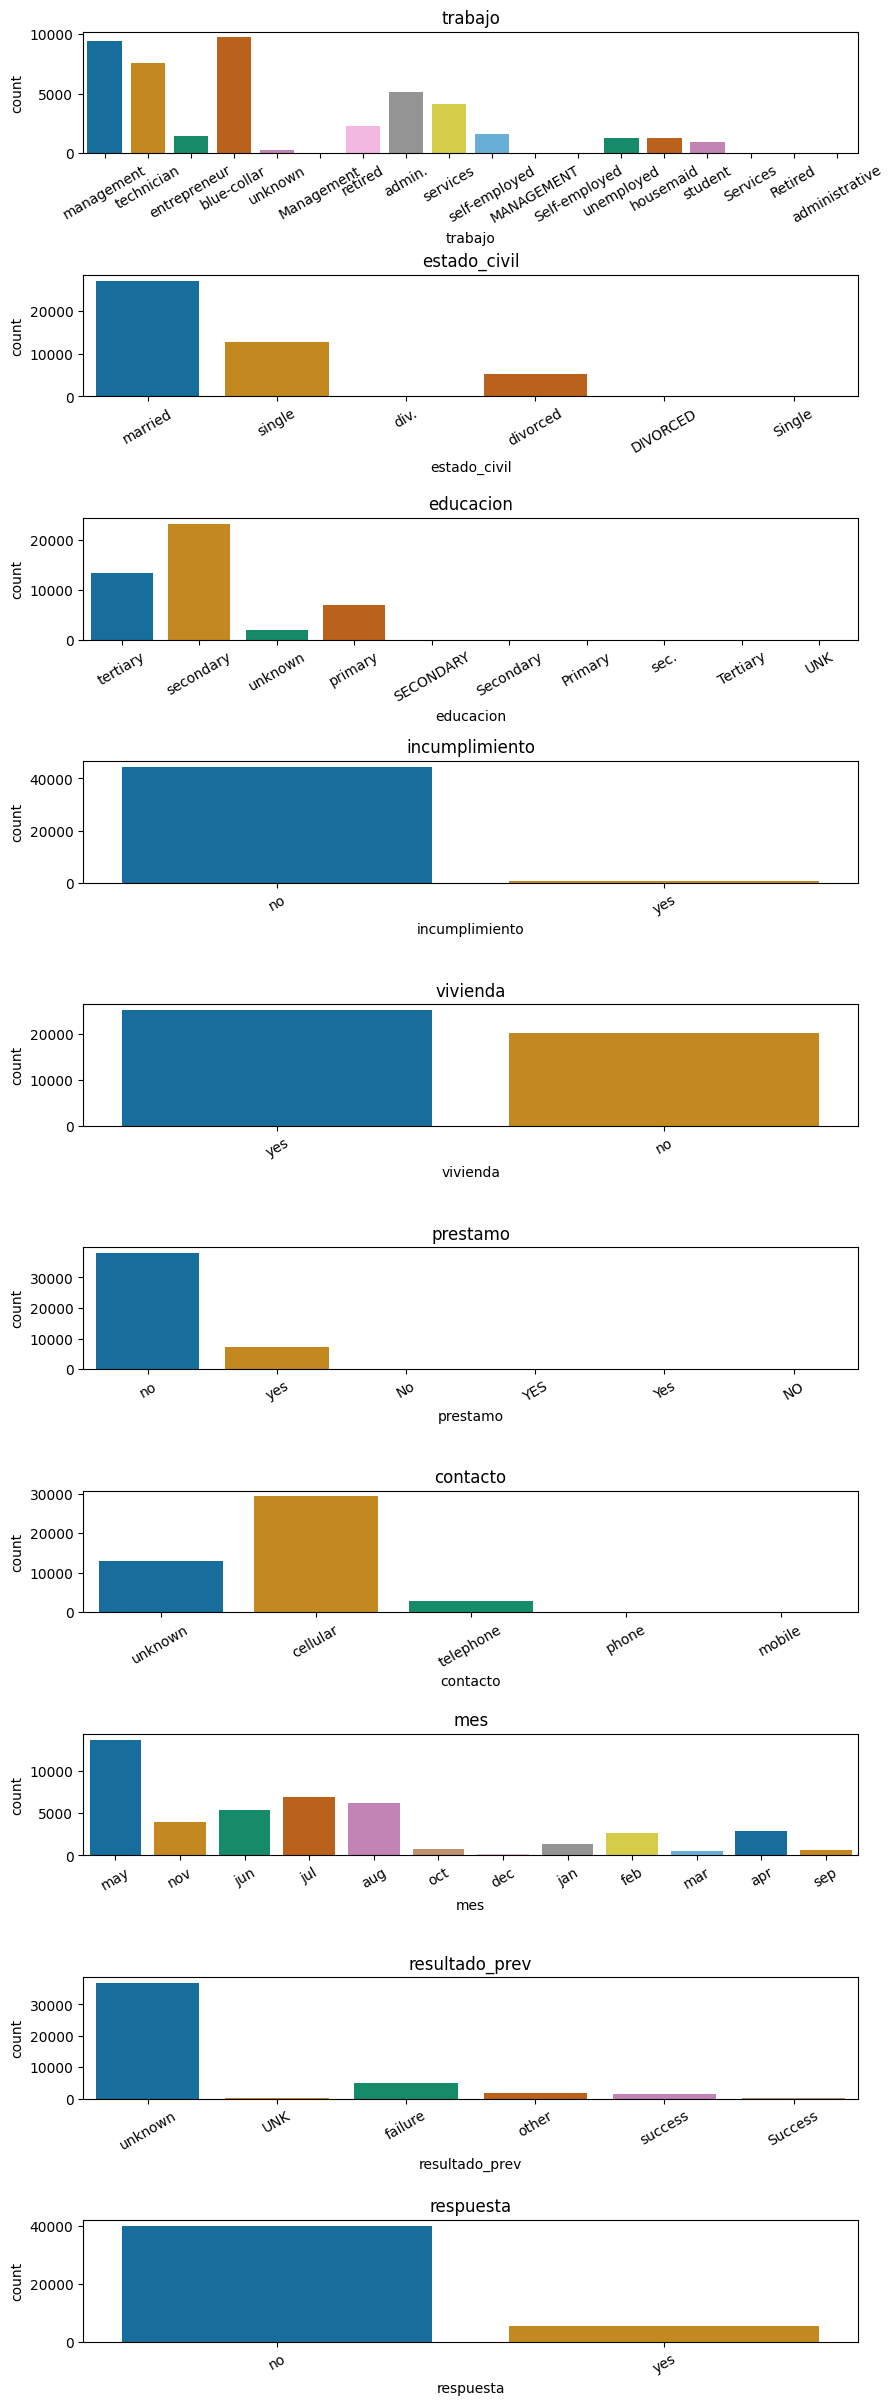

In [58]:
# Graficar los subniveles de cada variable categórica
cols_cat = ['trabajo', 'estado_civil', 'educacion', 'incumplimiento', 'vivienda',
       'prestamo', 'contacto', 'mes', 'resultado_prev', 'respuesta']

fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, hue=col, data=data, ax=ax[i], palette= 'colorblind', legend=False)
  ax[i].set_title(col)
  ax[i].tick_params(axis='x', labelrotation=30)

Inicialmente se observa que hay sub-niveles con el mismo nombre pero escritos en minúscula, en mayúscula o con la primera letra en mayúscula.

Unifiquemos estos sub-niveles inicialmente:

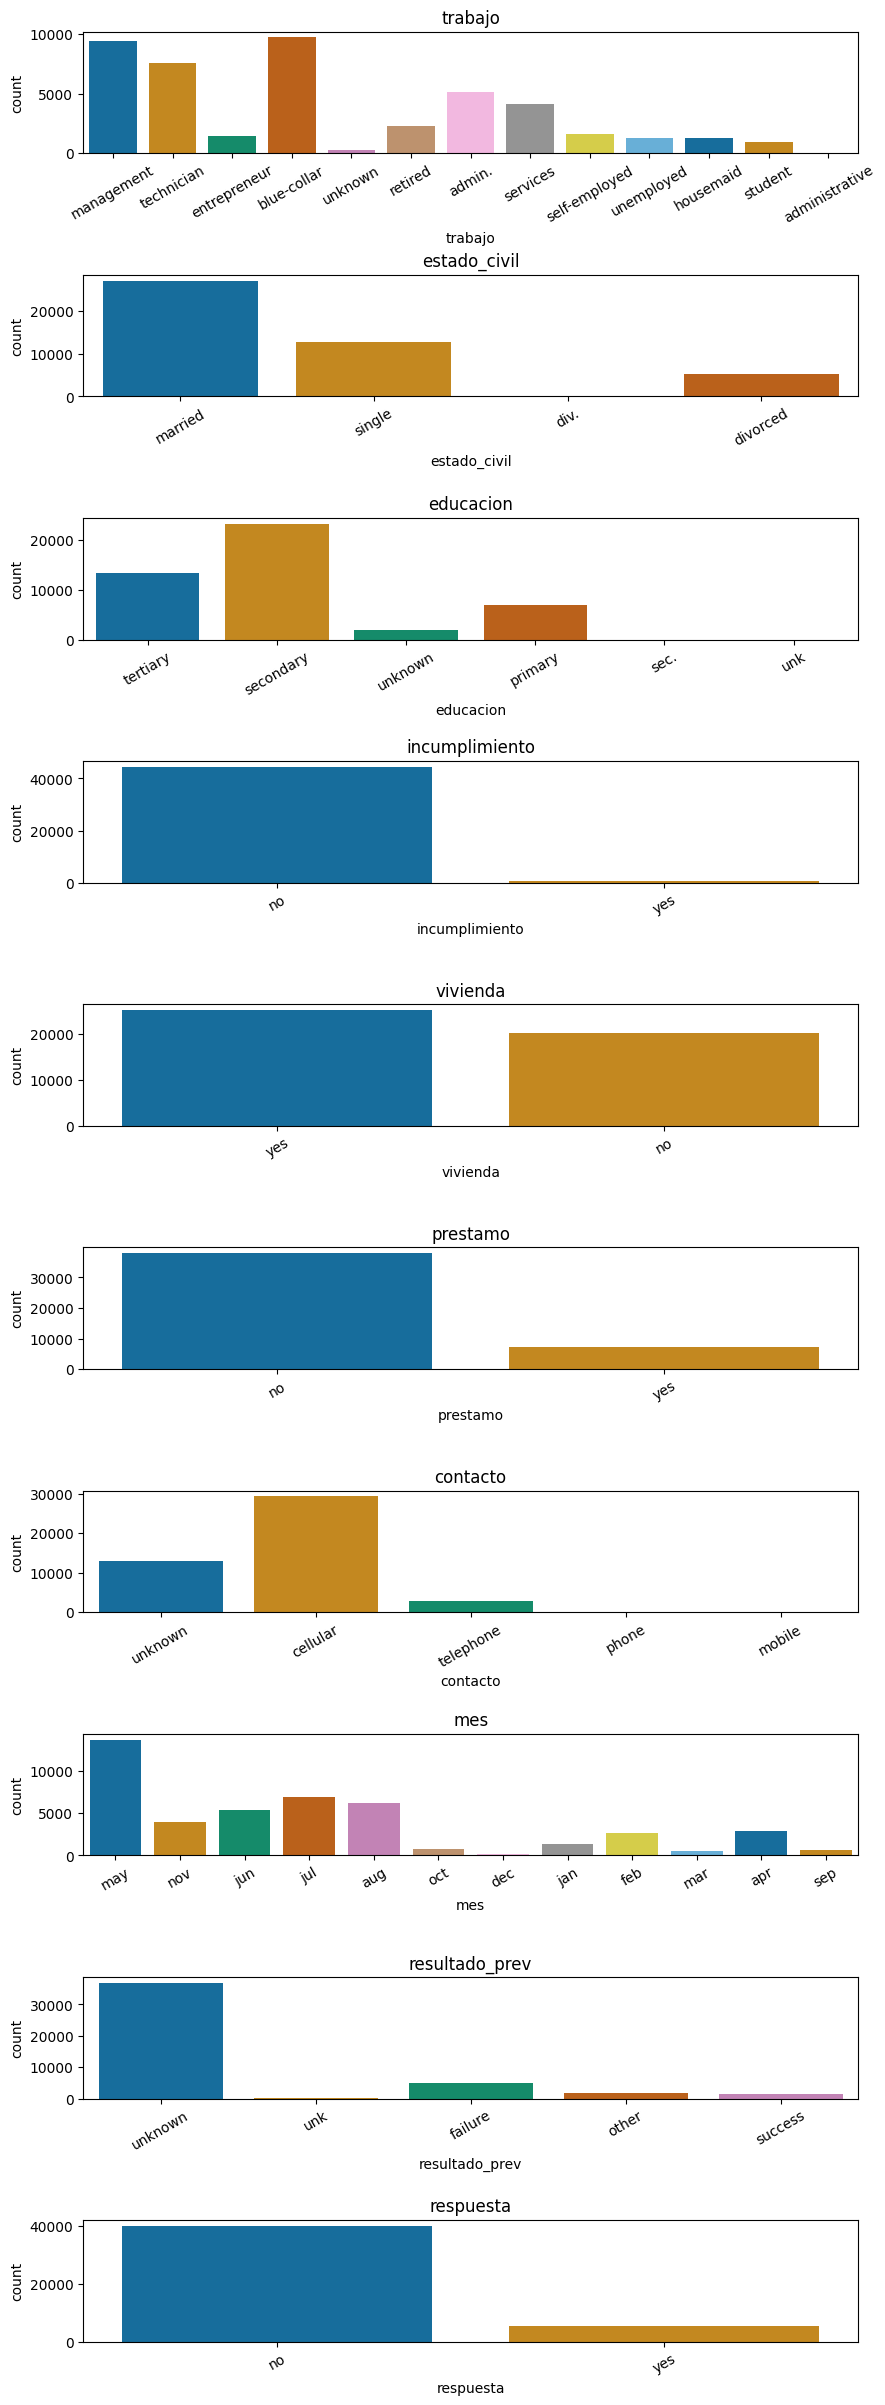

In [59]:
for column in data.columns:
#Representar en minúsculas sólo si la columna es categórica
    if column in cols_cat:
        data[column] = data[column].str.lower()

#generemos las gráficas nuevamente
fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, hue=col, data=data, ax=ax[i], palette='colorblind', legend=False)
  ax[i].set_title(col)
  ax[i].tick_params(axis='x', labelrotation=30)

In [60]:
# job: unificar admin. y administrative
print(data['trabajo'].unique())
data['trabajo'] = data['trabajo'].str.replace('admin.','administrative', regex=False)
print(data['trabajo'].unique())

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student' 'administrative']
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'administrative' 'services' 'self-employed' 'unemployed'
 'housemaid' 'student']


In [61]:
# marital: unificar div. y divorced
print(data['estado_civil'].unique())
data['estado_civil'] = data['estado_civil'].str.replace('div.','divorced', regex=False)
print(data['estado_civil'].unique())

['married' 'single' 'div.' 'divorced']
['married' 'single' 'divorced']


In [65]:
# education: unificar sec. y secondary, unk y unknown
print(data['educacion'].unique())
data['educacion'] = data['educacion'].str.replace('sec.','secondary', regex=False)
data.loc[data['educacion']=='unk','educacion'] = 'unknown'
print(data['educacion'].unique())

['tertiary' 'secondary' 'unknown' 'primary']
['tertiary' 'secondary' 'unknown' 'primary']


In [66]:
# contact: unificar telephone y phone
print(data['contacto'].unique())
data.loc[data['contacto']=='phone','contact'] = 'telephone'
data.loc[data['contacto']=='mobile','contact'] = 'cellular'
print(data['contacto'].unique())

['unknown' 'cellular' 'telephone' 'phone' 'mobile']
['unknown' 'cellular' 'telephone' 'phone' 'mobile']


In [67]:
# poutcome: unificar unk y unknown
print(data['resultado_prev'].unique())
data.loc[data['resultado_prev']=='unk','poutcome']='unknown'
print(data['resultado_prev'].unique())

['unknown' 'unk' 'failure' 'other' 'success']
['unknown' 'unk' 'failure' 'other' 'success']


In [69]:
#Edad(age) promedio(mean) de los clientes interesados en adquirir un certificado de depósito(y)
edad_promedio_interesados = data[data['respuesta'] == 'yes']['edad'].mean()
print("1. Edad promedio de los clientes interesados:", edad_promedio_interesados)

1. Edad promedio de los clientes interesados: 41.66477487703367


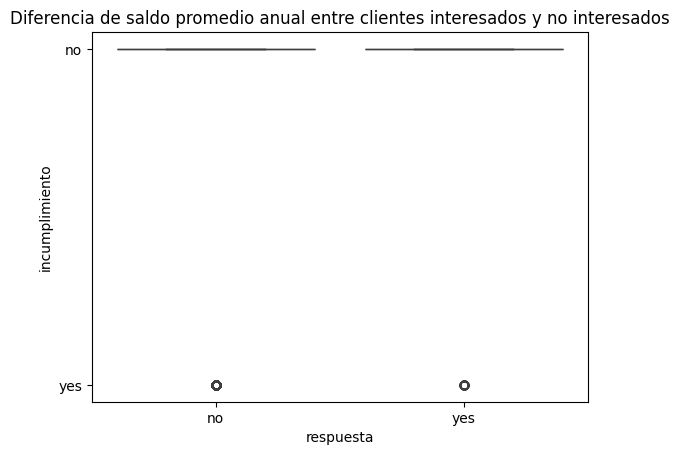

In [70]:
#Diferencia de ingresos entre clientes interesados y no interesados:
sns.boxplot(x='respuesta', y='incumplimiento', data=data)
plt.title('Diferencia de saldo promedio anual entre clientes interesados y no interesados')
plt.show()

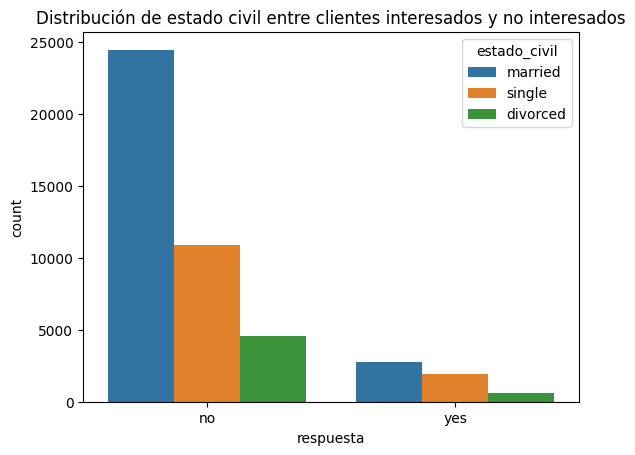

In [71]:
#Distribución de estado civil entre clientes interesados:
sns.countplot(x='respuesta', hue='estado_civil', data=data)
plt.title('Distribución de estado civil entre clientes interesados y no interesados')
plt.show()

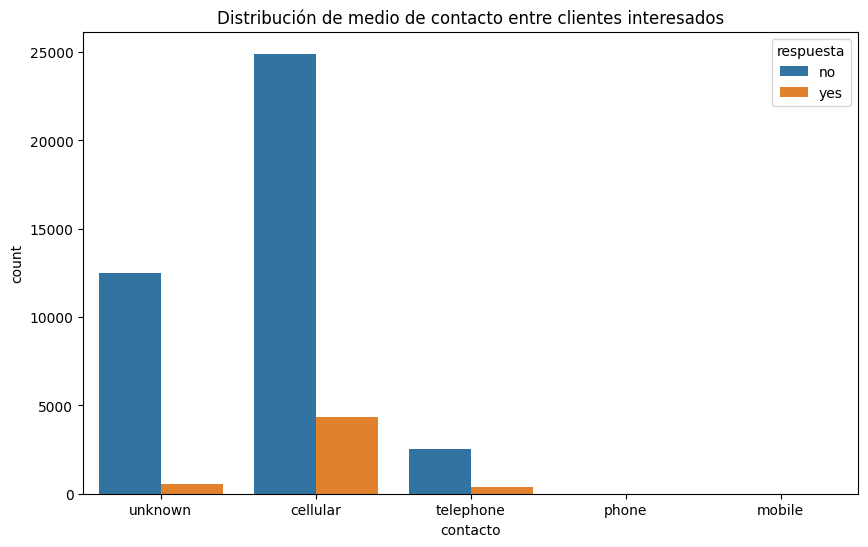

In [72]:
#Distribución medio de contacto de los clientes interesados:
plt.figure(figsize=(10, 6))
sns.countplot(x='contacto', hue='respuesta', data=data)
plt.title('Distribución de medio de contacto entre clientes interesados')
plt.show()

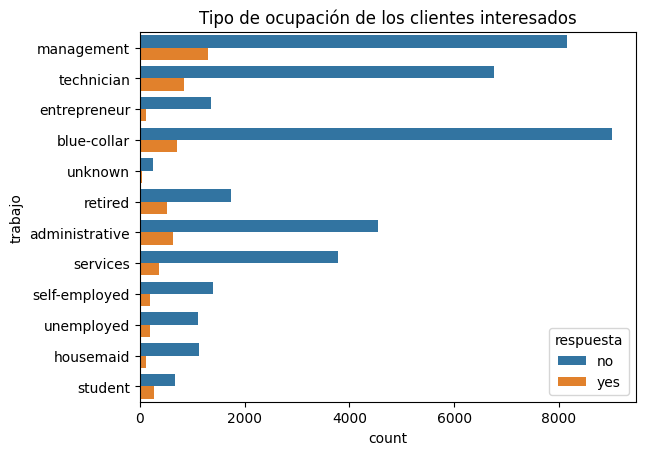

In [73]:
#Tipo de ocupación de los clientes interesados:
sns.countplot(y='trabajo', hue='respuesta', data=data)
plt.title('Tipo de ocupación de los clientes interesados')
plt.show()

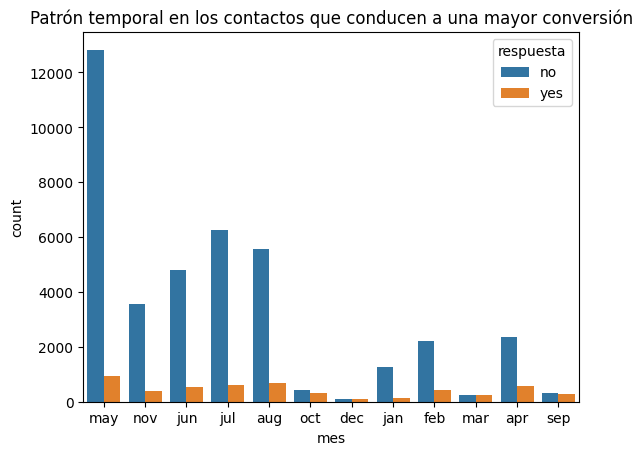

In [74]:
#Patrón temporal en los contactos que conducen a una mayor conversión de clientes:
sns.countplot(x='mes', hue='respuesta', data=data)
plt.title('Patrón temporal en los contactos que conducen a una mayor conversión')
plt.show()


## Uso de libreria pygwalker

https://docs.kanaries.net/es/pygwalker

https://nicolasurrego.medium.com/visualizaci%C3%B3n-avanzada-de-datos-descubre-el-poder-de-pygwalker-en-python-9d708724ddfb



In [75]:
#Instalación de librería
!pip install pygwalker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 956.2/956.2 kB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 83.6 MB/s eta 0:00:00


In [76]:
#Importo la librería con el alias
import pygwalker as pyg

In [77]:
#Lectura de dataset con librería
pyg.walk(data)

Box(children=(HTML(value='\n<div id="ifr-pyg-000624eb101e2bf4h24avHo15Ckg0W9J" style="height: auto">\n    <hea…